In [320]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_table_df = pd.merge(study_results_df, mouse_metadata_df)
# Display the data table for preview
data_table_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [321]:
# Checking the number of mice.
total_mice_count = data_table_df["Mouse ID"].nunique()

total_mice_count

249

In [322]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identify duplicate mice by Mouse ID and Timepoint
duplicate_mice = data_table_df[data_table_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the unique duplicate Mouse ID values
duplicate_ids = duplicate_mice["Mouse ID"].unique()

# Display the duplicate Mouse ID values and their data types
duplicate_ids

array(['g989'], dtype=object)

In [323]:
# Optional: Get all the data for the duplicate mouse ID.
# Group by Mouse ID and Timepoint and create a column indicating duplicate values
data_table_df["Duplicate?"] = data_table_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

# Filter DataFrame to get the duplicate rows
duplicate_rows = data_table_df[data_table_df["Duplicate?"]]

duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicate?
860,g989,0,45.000000,0,Propriva,Female,21,26,True
861,g989,0,45.000000,0,Propriva,Female,21,26,True
862,g989,5,48.786801,0,Propriva,Female,21,26,True
863,g989,5,47.570392,0,Propriva,Female,21,26,True
864,g989,10,51.745156,0,Propriva,Female,21,26,True
865,g989,10,49.880528,0,Propriva,Female,21,26,True
866,g989,15,51.325852,1,Propriva,Female,21,26,True
867,g989,15,53.442020,0,Propriva,Female,21,26,True
868,g989,20,55.326122,1,Propriva,Female,21,26,True
869,g989,20,54.657650,1,Propriva,Female,21,26,True


In [324]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Column to drop that is no longer required
data_table_df.drop("Duplicate?", axis=1, inplace=True)

# Mouse ID to drop
duplicate_mouse = "g989"

# Create a clean DataFrame by dropping rows with a specific 'Mouse ID'
clean_table_df = data_table_df.drop(data_table_df[data_table_df["Mouse ID"] == duplicate_mouse].index)

clean_table_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [325]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_table_df["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [326]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Assemble the resulting series into a single summary DataFrame.



In [327]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
def calculate_sem(data):
    return st.sem(data, nan_policy='omit')

summary_table = clean_table_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Vol=np.mean,
    Median_Tumor_Vol=np.median,
    Tumor_Vol_Variance=np.var,
    Tumor_Vol_Std_Dev=np.std,
    Tumor_Vol_Std_Err=calculate_sem
)
# Rename columns in the summary_stats datafrane
summary_stats = summary_table.rename(columns={
    'Mean_Tumor_Vol': 'Mean',
    'Median_Tumor_Vol': 'Median',
    'Tumor_Vol_Variance': 'Var',
    'Tumor_Vol_Std_Dev': 'Std',
    'Tumor_Vol_Std_Err': 'SEM'
})
# Using the aggregation method, produce the same summary statistics in a single line
# Adding a table header for 'Tumor Volume (mm3)'
summary_stats.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_stats.columns])

summary_stats

Tumor Volume (mm3)                                          
                           Mean     Median        Var       Std       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

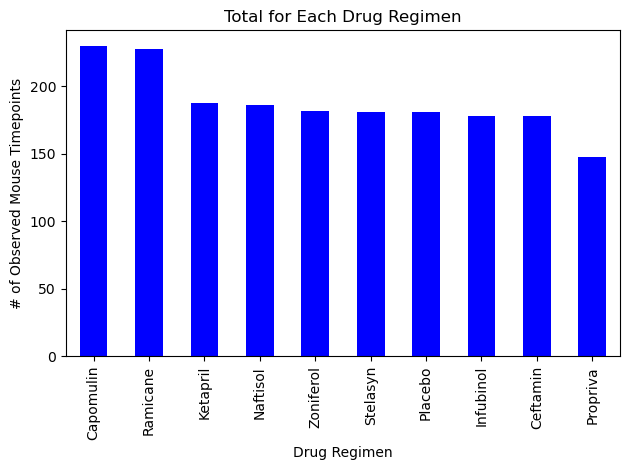

In [328]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Grouping by 'Drug Regimen' and counting the number of rows
drug_regimen_count = clean_table_df['Drug Regimen'].value_counts()

# Creating a bar plot
drug_regimen_count.plot(kind='bar', color='blue')
plt.title('Total for Each Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

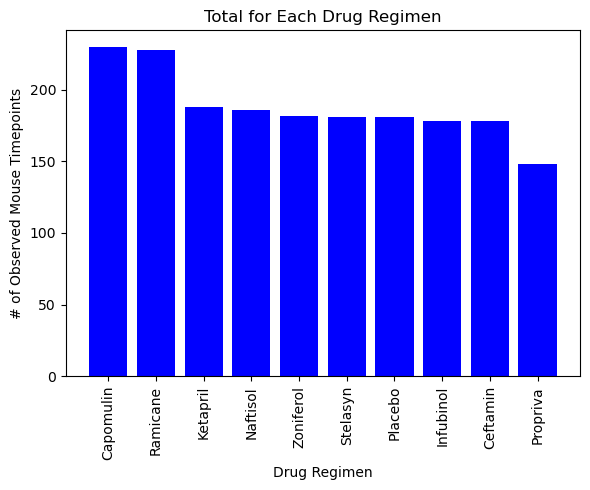

In [329]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Defining values for plotting
x_values = drug_regimen_count.index
y_values = drug_regimen_count.values

# Creating a bar plot using pyplot
plt.figure(figsize=(6, 5))
plt.bar(x_values, y_values, color="blue")
plt.title("Total for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

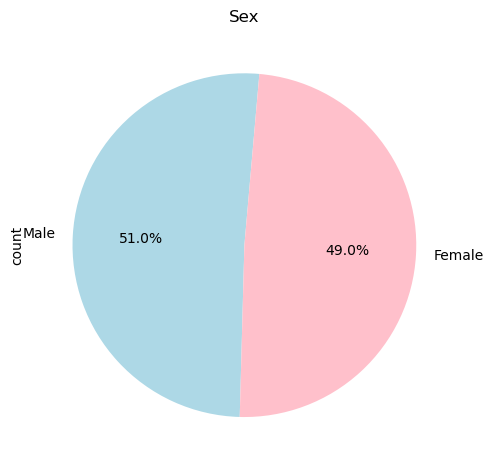

In [330]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of occurrences of each gender
gender_count = clean_table_df["Sex"].value_counts()

# Plotting a pie chart using Pandas plot function
gender_count.plot(kind='pie', colors=['lightblue', 'pink'], autopct='%1.1f%%', startangle=85)
plt.title("Sex")
plt.tight_layout()
plt.show()

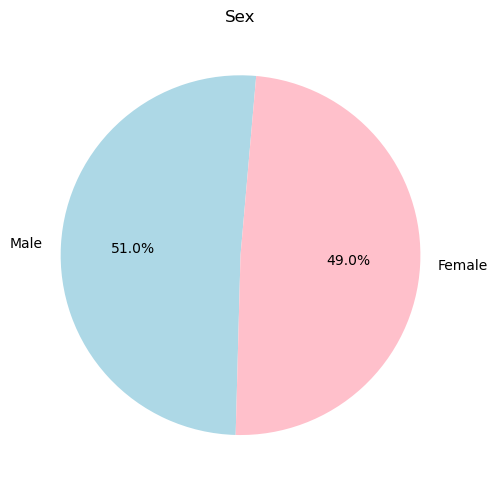

In [331]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6, 5))
plt.pie(gender_count, labels=gender_count.index, colors=['lightblue', 'pink'], autopct='%1.1f%%', startangle=85)
plt.title("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [332]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_table_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_clean_df = pd.merge(greatest_timepoint, clean_table_df, on=["Mouse ID", "Timepoint"])

In [333]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Iterate through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset_data = merged_clean_df.loc[merged_clean_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # add subset
    tumor_vol_data.append(subset_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = subset_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    middle_quartile = quartiles[0.5]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = subset_data[(subset_data < lower_bound) | (subset_data > upper_bound)]
    
    # Display treatment info and potential outliers
    if outliers.empty:
        print(f"There are no potential outliers for {treatment}!\n")
    else:
        print(f"Potential outliers for {treatment}:\n {outliers}\n")

There are no potential outliers for Capomulin!

There are no potential outliers for Ramicane!

Potential outliers for Infubinol:
 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

There are no potential outliers for Ceftamin!



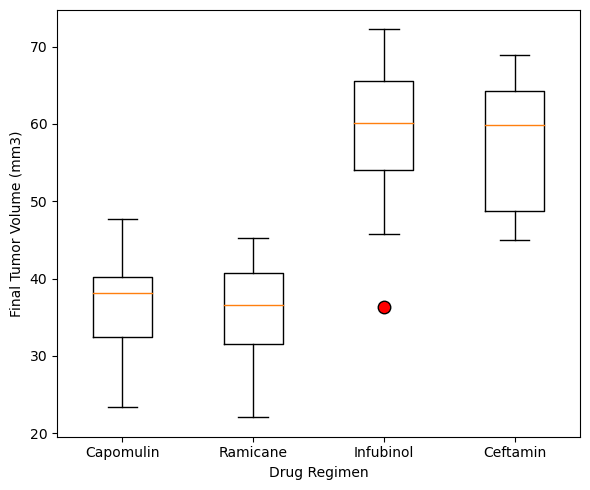

In [334]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 5))
plt.boxplot([merged_clean_df[merged_clean_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"],
             merged_clean_df[merged_clean_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"],
             merged_clean_df[merged_clean_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"],
             merged_clean_df[merged_clean_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]],
            labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=9))
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Line and Scatter Plots

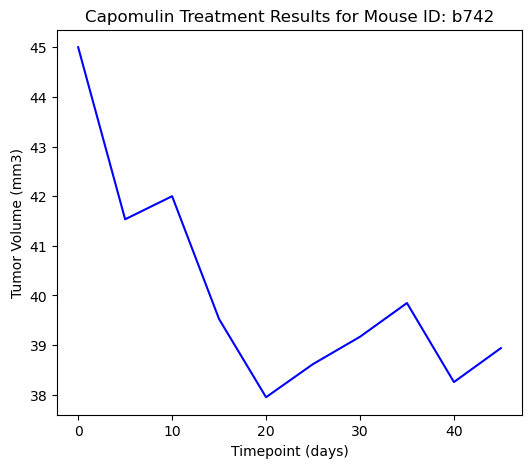

In [335]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_table_df[clean_table_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique().tolist()
random_mouse = random.choice(capomulin_mice)

# Filter the DataFrame for the selected mouse ID treated with Capomulin
single_mouse_data = clean_table_df[(clean_table_df['Mouse ID'] == random_mouse) & (clean_table_df['Drug Regimen'] == 'Capomulin')]

# Create a line plot for the selected mouse
plt.figure(figsize=(6, 5))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], color='blue')
plt.title(f"Capomulin Treatment Results for Mouse ID: {random_mouse}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

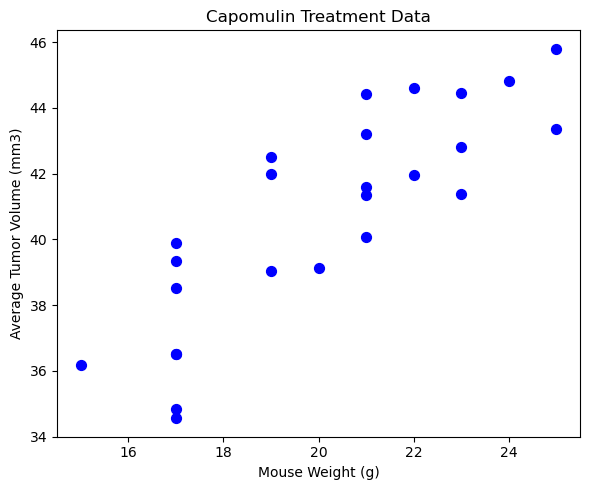

In [336]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_table_df[clean_table_df["Drug Regimen"] == "Capomulin"]
# Calcule the average tumor volume for each mouse
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Obtain weight for each mouse
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

# Creates the scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(mouse_weight, avg_tumor_vol, marker='o', facecolors='blue', s=50)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment Data")
plt.tight_layout()
plt.show()

## Correlation and Regression

Correlation between Mouse Weight and Average Tumor Volume is 0.84


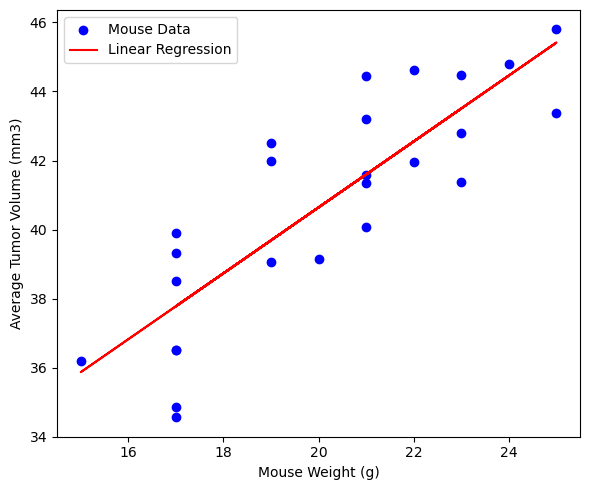

In [337]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
cor_coefficient = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1]
print(f"Correlation between Mouse Weight and Average Tumor Volume is {cor_coefficient:.2f}")

# Reshape the data for linear regression
# Input: Mouse Weight Output: Average Tumor Volume
x = mouse_weight.values.reshape(-1, 1)
y = avg_tumor_volume.values

# Create a linear regression model
model = LinearRegression()
model.fit(x, y)

predictions = model.predict(x)

# Plotting the linear regression line
plt.figure(figsize=(6, 5))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', label="Mouse Data")
plt.plot(mouse_weight, predictions, color='red', label="Linear Regression")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.tight_layout()
plt.show()